# Part2 EDA分析与聚类对比
---
## 2.1 EDA分析
### 2.1.1 运行准备

In [1]:
import data_prep
import common_dict

#basics
import numpy as np
import pandas as pd

#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

In [2]:
import warnings
warnings.filterwarnings("ignore")

### 2.1.2 导入数据，查看数据基本结构

In [3]:
# 证监会分类，百分比信息
df0z = data_prep.get_fund_data('fund_map_0_ZJH.csv')
df0z.head()

,fund_code,A,B,C,D,E,F,G,H,I,...,K,L,M,N,O,P,Q,R,S,X
0,000082,0.55,0.92,51.10,1.28,0.24,0.69,2.32,0.0,6.08,...,2.65,1.07,0.91,0.58,0.0,0.53,1.51,0.56,0.0,0.0
1,000309,0.00,0.00,36.64,0.00,0.00,0.01,5.68,0.0,14.94,...,0.00,0.00,6.75,0.02,0.0,0.00,0.00,0.00,0.0,0.0
2,000326,2.08,0.54,55.59,0.00,0.00,6.25,3.13,0.0,6.50,...,4.51,2.96,2.14,1.51,0.0,0.00,0.00,0.00,0.0,0.0
3,000409,0.00,0.00,91.19,0.00,0.00,0.00,0.00,0.0,1.54,...,0.00,0.61,0.03,0.01,0.0,0.00,0.00,0.00,0.0,0.0
4,000411,0.27,2.34,49.69,2.49,2.05,0.35,0.24,0.0,1.05,...,1.39,2.61,1.53,0.00,0.0,0.00,2.17,0.00,0.0,0.0


In [4]:
# 证监会分类，股本信息
df1z = data_prep.get_fund_data('fund_map_1_ZJH.csv')
df1z.head()

,fund_code,A,B,C,D,E,F,G,H,I,...,K,L,M,N,O,P,Q,R,S,X
0,000082,2067.631665,23435.381260,136493.269046,6597.946983,321.599160,288.236459,4817.321401,0.0,3609.814211,...,15793.275773,1903.917635,1994.355287,1054.641413,0.0,3268.721682,2080.535160,997.0114,0.0,0.0
1,000309,0.000000,0.000000,74432.779695,0.000000,0.000000,1.000000,3225.139216,0.0,12812.590708,...,0.000000,0.000000,13444.021241,4.034308,0.0,0.000000,0.000000,0.0000,0.0,0.0
2,000326,2739.298224,11663.589924,69730.483552,0.000000,0.000000,3765.656243,6454.434820,0.0,5088.097223,...,18023.838192,7266.416384,2796.080642,2348.471739,0.0,0.000000,0.000000,0.0000,0.0,0.0
3,000409,0.000000,0.000000,172074.069151,0.000000,0.000000,0.000000,0.000000,0.0,6874.534369,...,0.000000,1191.010055,2.287470,0.594700,0.0,0.000000,0.000000,0.0000,0.0,0.0
4,000411,1015.019181,36151.573720,204800.642597,13080.918735,10073.792575,1002.243375,1129.877385,0.0,1299.463543,...,3939.240536,16218.307881,2771.720349,0.000000,0.0,0.000000,1146.790843,0.0000,0.0,0.0


### 2.1.3 查看数据分布
1. 证监会类别按照百分比与股本分布

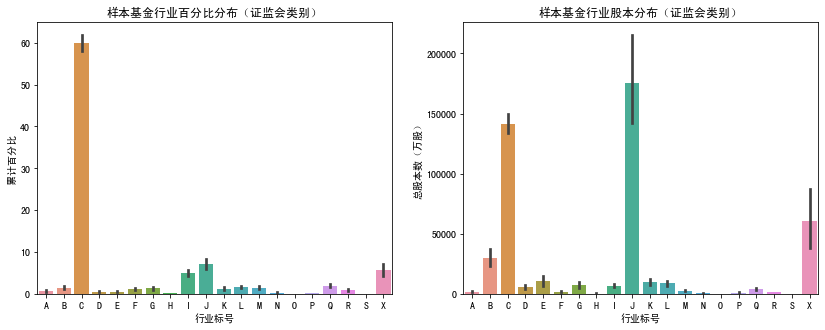

In [5]:
# 排除基金标号列
df0z_data = df0z.iloc[:, 1:]
df1z_data = df1z.iloc[:, 1:]

p1 = plt.figure(figsize=(14,5))
ax1 = p1.add_subplot(1,2,1)
sns.barplot(data=df0z_data)
plt.title("样本基金行业百分比分布（证监会类别）")
plt.ylabel('累计百分比')
plt.xlabel('行业标号')

ax2 = p1.add_subplot(1,2,2)
sns.barplot(data=df1z_data)
plt.title("样本基金行业股本分布（证监会类别）")
plt.ylabel('总股本数（万股）')
plt.xlabel('行业标号')

plt.show()

2. 证监会类别按照股本分布

---
## 2.2 聚类分析
### 2.2.1 聚类前数据分析
使用T-SNE方法将数据降维到二维或三维，查看分布信息（论证TSNE的优越性）
1. 证监会数据分布（2/3 - 维度；z - 证监会；p - 百分比；s - 股本）

In [6]:
# 数据计算
tsne2zp=TSNE()
tsne2zp.fit_transform(df0z_data)
tsne2zp=pd.DataFrame(tsne2zp.embedding_,index=df0z_data.index)

tsne3zp=TSNE(n_components=3)
tsne3zp.fit_transform(df0z_data)
tsne3zp=pd.DataFrame(tsne3zp.embedding_,index=df0z_data.index)

tsne2zs=TSNE()
tsne2zs.fit_transform(df1z_data)
tsne2zs=pd.DataFrame(tsne2zs.embedding_,index=df1z_data.index)

tsne3zs=TSNE(n_components=3)
tsne3zs.fit_transform(df1z_data)
tsne3zs=pd.DataFrame(tsne3zs.embedding_,index=df1z_data.index)

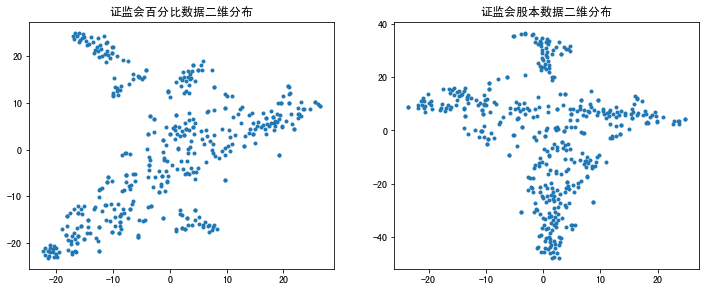

In [29]:
# 作图
p1 = plt.figure(figsize=(12,10))
ax1 = p1.add_subplot(2,2,1)
fig = plt.plot(tsne2zp[0],tsne2zp[1],'.')
plt.title("证监会百分比数据二维分布")
                
# ax2 = p1.add_subplot(2,2,2, projection = '3d')
# plt.plot(tsne3zp[0],tsne3zp[1],tsne3zp[2],'.')
# plt.title("证监会百分比数据三维分布")  

ax3 = p1.add_subplot(2,2,2)
fig = plt.plot(tsne2zs[0],tsne2zs[1],'.')
plt.title("证监会股本数据二维分布")
                
# ax4 = p1.add_subplot(2,2,4, projection = '3d')
# plt.plot(tsne3zs[0],tsne3zs[1],tsne3zs[2],'.')
# plt.title("证监会股本数据三维分布")  

                
plt.show()

### 2.2.2 K-Means初步聚类
使用sklean实现k-means初步聚类
1. 聚类簇数与SSE比对

In [8]:
# 证监会百分比数据
sse0z = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(df0z_data)
    sse0z[k] = kmeans.inertia_
    
sse1z = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(df1z_data)
    sse1z[k] = kmeans.inertia_

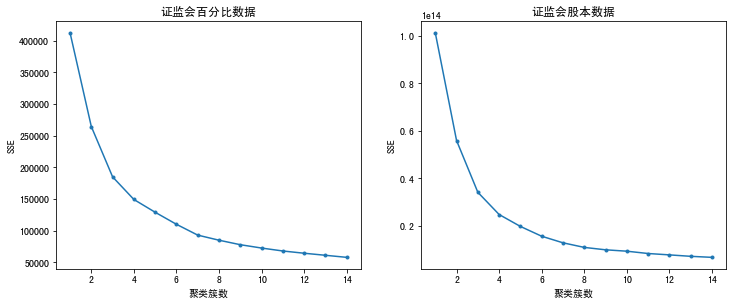

In [9]:
p1 = plt.figure(figsize=(12,10))
ax1 = p1.add_subplot(2,2,1)
plt.plot(list(sse0z.keys()), list(sse0z.values()),'.-')
plt.xlabel("聚类簇数")
plt.ylabel("SSE")
plt.title("证监会百分比数据")

ax2 = p1.add_subplot(2,2,2)
plt.plot(list(sse1z.keys()), list(sse1z.values()),'.-')
plt.xlabel("聚类簇数")
plt.ylabel("SSE")
plt.title("证监会股本数据")

p1.show()

2. 选择不同K值聚类

In [46]:
clusters = [6, 7, 8]

# 证监局百分比数据
# K-means聚类
pred = []
for n in clusters:
    kmeans = KMeans(n_clusters = n, init='k-means++')
    kmeans.fit(df0z_data)
    pred.append(kmeans.predict(df0z_data))

# 聚类结果分类
predictions_zp = pd.DataFrame(pred).T
predictions_zp.columns = ['cluster_6','cluster_7','cluster_8']
print(predictions_zp.apply(lambda row: row.value_counts(),axis = 0).fillna(0).astype("int"))

   cluster_6  cluster_7  cluster_8
0        154         14        129
1         35        160         14
2        125         71         71
3         43        116        118
4          6         42         39
5         72         26         26
6          0          6          6
7          0          0         32


In [51]:
# 证监局股本数据
# K-means聚类
clusters = [6, 7, 8]
pred = []
for n in clusters:
    kmeans = KMeans(n_clusters = n, init='k-means++')
    kmeans.fit(df1z_data)
    pred.append(kmeans.predict(df1z_data))

# 聚类结果分类
predictions_zs = pd.DataFrame(pred).T
predictions_zs.columns = ['cluster_6','cluster_7','cluster_8']
print(predictions_zs.apply(lambda row: row.value_counts(),axis = 0).fillna(0).astype("int"))

   cluster_6  cluster_7  cluster_8
0        322        322         31
1          3         56         18
2         56          2          2
3          5          3          5
4         20          3        291
5         29         20         58
6          0         29          3
7          0          0         27


3. 聚类结果作图

<Figure size 432x288 with 0 Axes>

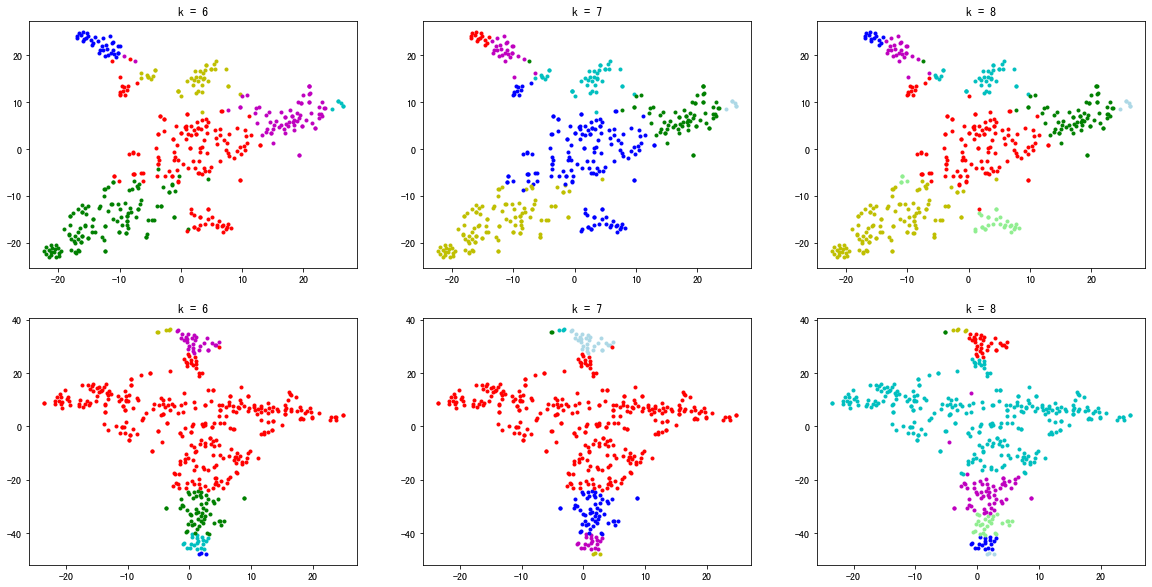

In [53]:
fig = plt.figure()
frame2zp = pd.DataFrame(tsne2zp)
frame3zp = pd.DataFrame(tsne3zp)

color = ['r', 'b', 'g', 'y', 'c', 'm', 'lightblue', 'lightgreen', 'orange']
sampleNum, _ = frame2zp.shape

p1 = plt.figure(figsize=(20,10))
ax1 = p1.add_subplot(2,3,1)
for i in range(sampleNum):
    markIndex = predictions_zp['cluster_6'][i]
    plt.plot(frame2zp[0][i], frame2zp[1][i], c=color[markIndex], marker = '.')
plt.title("k = 6")
    
ax2 = p1.add_subplot(2,3,2)
for i in range(sampleNum):
    markIndex = predictions_zp['cluster_7'][i]
    plt.plot(frame2zp[0][i], frame2zp[1][i], c=color[markIndex], marker = '.')
plt.title("k = 7")
    
ax3 = p1.add_subplot(2,3,3)
for i in range(sampleNum):
    markIndex = predictions_zp['cluster_8'][i]
    plt.plot(frame2zp[0][i], frame2zp[1][i], c=color[markIndex], marker = '.')
plt.title("k = 8")
    
frame2zs = pd.DataFrame(tsne2zs)
frame3zs = pd.DataFrame(tsne3zs)

color = ['r', 'b', 'g', 'y', 'c', 'm', 'lightblue', 'lightgreen', 'orange']
sampleNum, _ = frame2zs.shape

ax4 = p1.add_subplot(2,3,4)
for i in range(sampleNum):
    markIndex = predictions_zs['cluster_6'][i]
    plt.plot(frame2zs[0][i], frame2zs[1][i], c=color[markIndex], marker = '.')
plt.title("k = 6")
    
ax5 = p1.add_subplot(2,3,5)
for i in range(sampleNum):
    markIndex = predictions_zs['cluster_7'][i]
    plt.plot(frame2zs[0][i], frame2zs[1][i], c=color[markIndex], marker = '.')
plt.title("k = 7")
    
ax6 = p1.add_subplot(2,3,6)
for i in range(sampleNum):
    markIndex = predictions_zs['cluster_8'][i]
    plt.plot(frame2zs[0][i], frame2zs[1][i], c=color[markIndex], marker = '.')
plt.title("k = 8")

plt.show()

4. 聚类结果分析  
证监局百分比数据对应类别

In [41]:
# 证监局百分比聚类实际对应类别（k=6）
predictions = predictions_zp
means = df0z_data[predictions['cluster_6'] == 0].mean().sort_values(ascending=False)
sorted_cate = pd.DataFrame()
sorted_cate['cate_0'] = list(means.index)
sorted_cate['name_0'] = sorted_cate['cate_0'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_0'] = list(means)

means = df0z_data[predictions['cluster_6'] == 1].mean().sort_values(ascending=False)
sorted_cate['cate_1'] = list(means.index)
sorted_cate['name_1'] = sorted_cate['cate_1'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_1'] = list(means)

means = df0z_data[predictions['cluster_6'] == 2].mean().sort_values(ascending=False)
sorted_cate['cate_2'] = list(means.index)
sorted_cate['name_2'] = sorted_cate['cate_2'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_2'] = list(means)

means = df0z_data[predictions['cluster_6'] == 3].mean().sort_values(ascending=False)
sorted_cate['cate_3'] = list(means.index)
sorted_cate['name_3'] = sorted_cate['cate_3'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_3'] = list(means)

means = df0z_data[predictions['cluster_6'] == 4].mean().sort_values(ascending=False)
sorted_cate['cate_4'] = list(means.index)
sorted_cate['name_4'] = sorted_cate['cate_4'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_4'] = list(means)

means = df0z_data[predictions['cluster_6'] == 5].mean().sort_values(ascending=False)
sorted_cate['cate_5'] = list(means.index)
sorted_cate['name_5'] = sorted_cate['cate_5'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_5'] = list(means)

sorted_cate.head()

,cate_0,name_0,mean_0,cate_1,name_1,mean_1,cate_2,name_2,mean_2,cate_3,name_3,mean_3,cate_4,name_4,mean_4,cate_5,name_5,mean_5
0,C,制造业,78.247836,C,制造业,58.220066,C,制造业,35.967917,C,制造业,41.850580,J,金融业,71.771667,X,非H股,76.853571
1,I,信息传输、软件和信息技术服务业,2.182632,I,信息传输、软件和信息技术服务业,9.065364,X,非H股,35.783750,J,金融业,22.414783,X,非H股,8.210000,C,制造业,10.494286
2,J,金融业,1.958655,J,金融业,4.549338,I,信息传输、软件和信息技术服务业,3.683750,I,信息传输、软件和信息技术服务业,4.536957,K,房地产业,5.393333,I,信息传输、软件和信息技术服务业,0.525714
3,Q,卫生和社会工作,1.588187,Q,卫生和社会工作,3.321192,J,金融业,3.073333,K,房地产业,4.026232,C,制造业,5.208333,G,交通运输、仓储和邮政业,0.162857
4,L,租赁和商务服务业,1.470702,M,科学研究和技术服务业,2.417550,G,交通运输、仓储和邮政业,2.748750,G,交通运输、仓储和邮政业,3.471304,B,采矿业,0.801667,F,批发和零售业,0.107143


In [44]:
# 证监局百分比聚类实际对应类别（k=7）
means = df0z_data[predictions['cluster_7'] == 0].mean().sort_values(ascending=False)
sorted_cate = pd.DataFrame()
sorted_cate['cate_0'] = list(means.index)
sorted_cate['name_0'] = sorted_cate['cate_0'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_0'] = list(means)

means = df0z_data[predictions['cluster_7'] == 1].mean().sort_values(ascending=False)
sorted_cate['cate_1'] = list(means.index)
sorted_cate['name_1'] = sorted_cate['cate_1'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_1'] = list(means)

means = df0z_data[predictions['cluster_7'] == 2].mean().sort_values(ascending=False)
sorted_cate['cate_2'] = list(means.index)
sorted_cate['name_2'] = sorted_cate['cate_2'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_2'] = list(means)

means = df0z_data[predictions['cluster_7'] == 3].mean().sort_values(ascending=False)
sorted_cate['cate_3'] = list(means.index)
sorted_cate['name_3'] = sorted_cate['cate_3'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_3'] = list(means)

means = df0z_data[predictions['cluster_7'] == 4].mean().sort_values(ascending=False)
sorted_cate['cate_4'] = list(means.index)
sorted_cate['name_4'] = sorted_cate['cate_4'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_4'] = list(means)

means = df0z_data[predictions['cluster_7'] == 5].mean().sort_values(ascending=False)
sorted_cate['cate_5'] = list(means.index)
sorted_cate['name_5'] = sorted_cate['cate_5'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_5'] = list(means)

means = df0z_data[predictions['cluster_7'] == 6].mean().sort_values(ascending=False)
sorted_cate['cate_6'] = list(means.index)
sorted_cate['name_6'] = sorted_cate['cate_6'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_6'] = list(means)

pd.set_option('display.max_columns',None)
sorted_cate.head()


,cate_0,name_0,mean_0,cate_1,name_1,mean_1,cate_2,name_2,mean_2,cate_3,name_3,mean_3,cate_4,name_4,mean_4,cate_5,name_5,mean_5,cate_6,name_6,mean_6
0,C,制造业,43.060000,X,非H股,76.853571,J,金融业,71.771667,C,制造业,63.182710,C,制造业,36.984615,C,制造业,81.718770,C,制造业,52.211220
1,J,金融业,22.206338,C,制造业,10.494286,X,非H股,8.210000,J,金融业,4.491161,X,非H股,34.462692,I,信息传输、软件和信息技术服务业,2.237869,I,信息传输、软件和信息技术服务业,24.955854
2,K,房地产业,3.981831,I,信息传输、软件和信息技术服务业,0.525714,K,房地产业,5.393333,Q,卫生和社会工作,3.992387,I,信息传输、软件和信息技术服务业,3.825385,J,金融业,1.416230,X,非H股,2.880732
3,G,交通运输、仓储和邮政业,3.508592,G,交通运输、仓储和邮政业,0.162857,C,制造业,5.208333,I,信息传输、软件和信息技术服务业,3.265548,J,金融业,3.097692,L,租赁和商务服务业,1.322705,J,金融业,2.833171
4,I,信息传输、软件和信息技术服务业,3.404648,F,批发和零售业,0.107143,B,采矿业,0.801667,M,科学研究和技术服务业,2.764968,G,交通运输、仓储和邮政业,2.725769,B,采矿业,1.155082,L,租赁和商务服务业,2.185610


In [45]:
# 证监局百分比聚类实际对应类别（k=8）
means = df0z_data[predictions['cluster_8'] == 0].mean().sort_values(ascending=False)
sorted_cate = pd.DataFrame()
sorted_cate['cate_0'] = list(means.index)
sorted_cate['name_0'] = sorted_cate['cate_0'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_0'] = list(means)

means = df0z_data[predictions['cluster_8'] == 1].mean().sort_values(ascending=False)
sorted_cate['cate_1'] = list(means.index)
sorted_cate['name_1'] = sorted_cate['cate_1'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_1'] = list(means)

means = df0z_data[predictions['cluster_8'] == 2].mean().sort_values(ascending=False)
sorted_cate['cate_2'] = list(means.index)
sorted_cate['name_2'] = sorted_cate['cate_2'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_2'] = list(means)

means = df0z_data[predictions['cluster_8'] == 3].mean().sort_values(ascending=False)
sorted_cate['cate_3'] = list(means.index)
sorted_cate['name_3'] = sorted_cate['cate_3'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_3'] = list(means)

means = df0z_data[predictions['cluster_8'] == 4].mean().sort_values(ascending=False)
sorted_cate['cate_4'] = list(means.index)
sorted_cate['name_4'] = sorted_cate['cate_4'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_4'] = list(means)

means = df0z_data[predictions['cluster_8'] == 5].mean().sort_values(ascending=False)
sorted_cate['cate_5'] = list(means.index)
sorted_cate['name_5'] = sorted_cate['cate_5'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_5'] = list(means)

means = df0z_data[predictions['cluster_8'] == 6].mean().sort_values(ascending=False)
sorted_cate['cate_6'] = list(means.index)
sorted_cate['name_6'] = sorted_cate['cate_6'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_6'] = list(means)

means = df0z_data[predictions['cluster_8'] == 7].mean().sort_values(ascending=False)
sorted_cate['cate_7'] = list(means.index)
sorted_cate['name_7'] = sorted_cate['cate_7'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_7'] = list(means)

pd.set_option('display.max_columns',None)
sorted_cate.head()

,cate_0,name_0,mean_0,cate_1,name_1,mean_1,cate_2,name_2,mean_2,cate_3,name_3,mean_3,cate_4,name_4,mean_4,cate_5,name_5,mean_5,cate_6,name_6,mean_6,cate_7,name_7,mean_7
0,C,制造业,62.078125,C,制造业,36.984615,C,制造业,42.842714,C,制造业,82.008475,X,非H股,76.853571,C,制造业,51.581579,C,制造业,63.651450,J,金融业,71.771667
1,Q,卫生和社会工作,14.349063,X,非H股,34.462692,J,金融业,22.231143,I,信息传输、软件和信息技术服务业,2.116780,C,制造业,10.494286,I,信息传输、软件和信息技术服务业,25.659211,J,金融业,5.607176,X,非H股,8.210000
2,M,科学研究和技术服务业,10.054688,I,信息传输、软件和信息技术服务业,3.825385,K,房地产业,4.019000,L,租赁和商务服务业,1.351695,I,信息传输、软件和信息技术服务业,0.525714,X,非H股,3.108158,I,信息传输、软件和信息技术服务业,4.340000,K,房地产业,5.393333
3,F,批发和零售业,2.590312,J,金融业,3.097692,G,交通运输、仓储和邮政业,3.528143,J,金融业,1.346271,G,交通运输、仓储和邮政业,0.162857,J,金融业,2.856842,L,租赁和商务服务业,2.200076,C,制造业,5.208333
4,X,非H股,0.990937,G,交通运输、仓储和邮政业,2.725769,I,信息传输、软件和信息技术服务业,3.412286,B,采矿业,1.184915,F,批发和零售业,0.107143,L,租赁和商务服务业,2.278158,B,采矿业,1.908702,B,采矿业,0.801667


证监局股本数据对应类别

In [57]:
# 证监局股本聚类实际对应类别（k=6）
predictions = predictions_zs
means = df1z_data[predictions['cluster_6'] == 0].mean().sort_values(ascending=False)
sorted_cate = pd.DataFrame()
sorted_cate['cate_0'] = list(means.index)
sorted_cate['name_0'] = sorted_cate['cate_0'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_0'] = list(means)

means = df1z_data[predictions['cluster_6'] == 1].mean().sort_values(ascending=False)
sorted_cate['cate_1'] = list(means.index)
sorted_cate['name_1'] = sorted_cate['cate_1'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_1'] = list(means)

means = df1z_data[predictions['cluster_6'] == 2].mean().sort_values(ascending=False)
sorted_cate['cate_2'] = list(means.index)
sorted_cate['name_2'] = sorted_cate['cate_2'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_2'] = list(means)

means = df1z_data[predictions['cluster_6'] == 3].mean().sort_values(ascending=False)
sorted_cate['cate_3'] = list(means.index)
sorted_cate['name_3'] = sorted_cate['cate_3'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_3'] = list(means)

means = df1z_data[predictions['cluster_6'] == 4].mean().sort_values(ascending=False)
sorted_cate['cate_4'] = list(means.index)
sorted_cate['name_4'] = sorted_cate['cate_4'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_4'] = list(means)

means = df1z_data[predictions['cluster_6'] == 5].mean().sort_values(ascending=False)
sorted_cate['cate_5'] = list(means.index)
sorted_cate['name_5'] = sorted_cate['cate_5'].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_5'] = list(means)

sorted_cate.head()

,cate_0,name_0,mean_0,cate_1,name_1,mean_1,cate_2,name_2,mean_2,cate_3,name_3,mean_3,cate_4,name_4,mean_4,cate_5,name_5,mean_5
0,C,制造业,144385.539001,J,金融业,2.759519e+06,J,金融业,489533.816402,X,非H股,2.135616e+06,J,金融业,1.329291e+06,X,非H股,402905.030751
1,J,金融业,39983.973310,B,采矿业,3.889102e+05,C,制造业,149086.982108,J,金融业,5.758851e+04,C,制造业,1.794858e+05,C,制造业,87387.584683
2,B,采矿业,18091.509771,C,制造业,1.365597e+05,B,采矿业,58385.220563,C,制造业,2.939786e+04,B,采矿业,1.198752e+05,J,金融业,35264.306892
3,X,非H股,10428.309006,D,电力、热力、燃气及水生产和供应业,1.014045e+05,E,建筑业,49845.618477,K,房地产业,1.159450e+04,E,建筑业,4.234759e+04,G,交通运输、仓储和邮政业,8549.201575
4,L,租赁和商务服务业,9367.163125,K,房地产业,3.883298e+04,K,房地产业,34365.226535,G,交通运输、仓储和邮政业,9.658558e+03,K,房地产业,3.122464e+04,L,租赁和商务服务业,4966.227384


In [21]:
print(list(df0z[df0z.sum(axis = 1)==0]['fund_code']))

[]


In [ ]:
# ax4 = p1.add_subplot(2,3,4, projection = '3d')
# for i in range(sampleNum):
#     markIndex = predictions['cluster_6'][i]
#     plt.plot(frame3zp[0][i], frame3zp[1][i], frame3zp[2][i], c=color[markIndex], marker = '.')
    
# ax5 = p1.add_subplot(2,3,5, projection = '3d')
# for i in range(sampleNum):
#     markIndex = predictions['cluster_7'][i]
#     plt.plot(frame3zp[0][i], frame3zp[1][i], frame3zp[2][i], c=color[markIndex], marker = '.')
    
# ax6 = p1.add_subplot(2,3,6, projection = '3d')
# for i in range(sampleNum):
#     markIndex = predictions['cluster_8'][i]
#     plt.plot(frame3zp[0][i], frame3zp[1][i], frame3zp[2][i], c=color[markIndex], marker = '.')